In [1]:
import pandas as pd

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle, resample
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt

import scikitplot as skplt

import pickle

import re

import string

In [2]:
def test_languages(X_test, true_values, predictions):
    """"
    Takes in data and model predictions. Prints results to visualize performance
    """
    
    true_values = np.array(true_values)
    
    for i, sentence in enumerate(X_test):
        prediction = float(predictions[i])
        true_value = float(true_values[i])
        print("Prediction: " + str(labels[prediction]))
        print("Actual Language: " + str(labels[true_value]))
        print("Input Sentence: ")
        print(sentence)
        print('\n')

In [3]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Change to lower case
    3. Remove numbers
    4. Remove white space
    5. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Convert upper to lower case
    nopunc = nopunc.lower()
    
    # Remove numbers
    nopunc = re.sub(r'\d+', '', nopunc)
    
    # Remove white spaces
    return nopunc.strip()

In [4]:
def read_data(filename):
    
    df = pd.read_csv(filename)    
    return df

In [5]:
def process_data(filename):
    
    df = read_data(filename)
    df.dropna(inplace=True)
    df.drop_duplicates(inplace=True)
    df['text'] = df['text'].astype(str)
    df['text'] = df['text'].apply(text_process)
    df.drop_duplicates(inplace=True)
    df['labels'] = df.language.map({'English': 0, 'Afrikaans': 1, 'Nederlands': 2})
    
    return df    

In [6]:
df = process_data('lang_data_holdout_unprocessed.csv')

In [7]:
text_clf = pickle.load(open('language_classifier', 'rb'))

In [8]:
predict_final = text_clf.predict(df.text)
print(classification_report(df.labels, predict_final, target_names=df.language.unique()))

              precision    recall  f1-score   support

     English       1.00      0.97      0.99       199
   Afrikaans       0.97      1.00      0.99        70
  Nederlands       0.57      1.00      0.73         4

    accuracy                           0.98       273
   macro avg       0.85      0.99      0.90       273
weighted avg       0.99      0.98      0.98       273



Confusion matrix, without normalization
[[194   2   3]
 [  0  70   0]
 [  0   0   4]]
Normalized confusion matrix
[[0.97487437 0.01005025 0.01507538]
 [0.         1.         0.        ]
 [0.         0.         1.        ]]


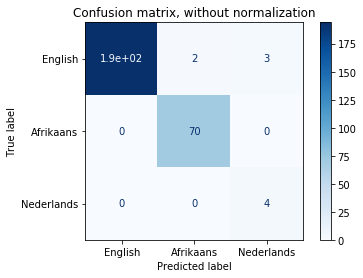

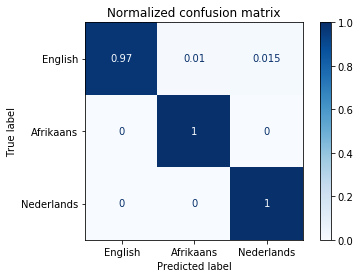

In [9]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
class_names = ['English', 'Afrikaans', 'Nederlands']
for title, normalize in titles_options:
    disp = plot_confusion_matrix(text_clf, df.text, df.labels,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    plt.grid(False)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
    
plt.grid(False)
plt.show()

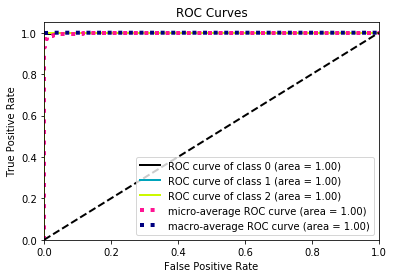

In [10]:
y_prob = text_clf.predict_proba(df.text)

plot = skplt.metrics.plot_roc(df.labels, y_prob)
plt.title("ROC Curves");

In [11]:
labels = {0.0:'English', 1.0:'Afrikaans', 2.0: 'Nederlands'}
test_languages(df.text, df.labels, predict_final)

Prediction: English
Actual Language: English
Input Sentence: 
out of sorts


Prediction: English
Actual Language: English
Input Sentence: 
up a gum tree


Prediction: English
Actual Language: English
Input Sentence: 
stand and deliver


Prediction: Afrikaans
Actual Language: Afrikaans
Input Sentence: 
al die suksesse in die wêreld is gebaseer op toewyding en ‘n goeie wil


Prediction: English
Actual Language: English
Input Sentence: 
bring home the bacon


Prediction: English
Actual Language: English
Input Sentence: 
never knowingly undersold


Prediction: Afrikaans
Actual Language: Afrikaans
Input Sentence: 
jy beny my blink skoene omdat jy nie weet van die liddorings wat binne pyn nie


Prediction: English
Actual Language: English
Input Sentence: 
body surfing


Prediction: English
Actual Language: English
Input Sentence: 
a picture is worth a thousand words


Prediction: English
Actual Language: English
Input Sentence: 
pour oil on troubled waters


Prediction: English
Actual Langua